# Food Delivery Hackathon Analysis
This notebook contains:
- Loading and merging CSV, JSON, SQL datasets
- Exploratory data analysis
- Charts and insights for hackathon questions
- Answers to all questions


<h2> Step-1 Loading orders CSV data</h2>

In [5]:
# step-1 Loading orders CSV data

import pandas as pd
orders_df = pd.read_csv("orders.csv")
orders_df.head(10)


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
5,6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian
6,7,970,35,30-05-2023,129.21,Royal Biryani North Indian
7,8,891,57,07-11-2023,269.19,Spice Mess Punjabi
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi
9,10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg


<h2>Step-2 Loading restaurants json data</h2>

In [6]:
# step -2 Loading restaurants json data
users_df = pd.read_json("users.json")
users_df.head(10)

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
5,6,User_6,Pune,Gold
6,7,User_7,Chennai,Gold
7,8,User_8,Hyderabad,Regular
8,9,User_9,Bangalore,Gold
9,10,User_10,Chennai,Regular


<h2>Step-3 Loading SQL data</h2>

In [4]:
#step-3 Loading SQL data

import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="food_delivery"
)

restaurants_df = pd.read_sql(
    "SELECT * FROM restaurants",
    conn
)

print(restaurants_df.head(10))


   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8
5              6    Restaurant_6  Chinese     4.8
6              7    Restaurant_7  Italian     3.2
7              8    Restaurant_8   Indian     4.8
8              9    Restaurant_9  Italian     3.1
9             10   Restaurant_10  Chinese     3.4


C:\Users\moham\AppData\Local\Temp\ipykernel_13544\1921625933.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  restaurants_df = pd.read_sql(


<h2>Step-4 Merging the data</h2>

In [7]:
#Step-4 Merge the data

final_df = (
    orders_df
    .merge(users_df, on="user_id", how="left")
    .merge(restaurants_df, on="restaurant_id", how="left")
)


In [8]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [9]:
final_df.head(10)

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
5,6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Restaurant_499,Mexican,4.9
6,7,970,35,30-05-2023,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular,Restaurant_35,Chinese,3.9
7,8,891,57,07-11-2023,269.19,Spice Mess Punjabi,User_891,Pune,Regular,Restaurant_57,Mexican,4.4
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold,Restaurant_7,Italian,3.2
9,10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg,User_2972,Bangalore,Regular,Restaurant_183,Chinese,3.7


In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load final dataset
final_df = pd.read_csv("final_food_delivery_dataset.csv")

# Ensure date column is datetime
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df.head(10)

C:\Users\moham\AppData\Local\Temp\ipykernel_13544\1120173149.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
5,6,2933,499,2023-07-12,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Restaurant_499,Mexican,4.9
6,7,970,35,2023-05-30,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular,Restaurant_35,Chinese,3.9
7,8,891,57,2023-11-07,269.19,Spice Mess Punjabi,User_891,Pune,Regular,Restaurant_57,Mexican,4.4
8,9,364,7,2023-12-05,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold,Restaurant_7,Italian,3.2
9,10,2972,183,2023-12-30,351.41,Taste of Biryani Non-Veg,User_2972,Bangalore,Regular,Restaurant_183,Chinese,3.7


In [15]:
final_df.shape

(10000, 12)

In [16]:
final_df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [17]:
final_df.describe()

,order_id,user_id,restaurant_id,order_date,total_amount,rating
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,2023-07-02 11:45:53.280000,801.162412,4.045430
min,1.00000,1.000000,1.000000,2023-01-01 00:00:00,100.200000,3.000000
25%,2500.75000,761.000000,127.000000,2023-04-01 00:00:00,446.310000,3.500000
50%,5000.50000,1508.000000,251.000000,2023-07-03 00:00:00,806.295000,4.100000
75%,7500.25000,2250.250000,376.000000,2023-10-02 00:00:00,1149.227500,4.600000
max,10000.00000,3000.000000,500.000000,2024-01-01 00:00:00,1499.830000,5.000000
std,2886.89568,861.727776,144.622558,NaN,405.458753,0.606531


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           10000 non-null  int64         
 1   user_id            10000 non-null  int64         
 2   restaurant_id      10000 non-null  int64         
 3   order_date         10000 non-null  datetime64[ns]
 4   total_amount       10000 non-null  float64       
 5   restaurant_name_x  10000 non-null  object        
 6   name               10000 non-null  object        
 7   city               10000 non-null  object        
 8   membership         10000 non-null  object        
 9   restaurant_name_y  10000 non-null  object        
 10  cuisine            10000 non-null  object        
 11  rating             10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 937.6+ KB


<h2>Order trends over time</h2>

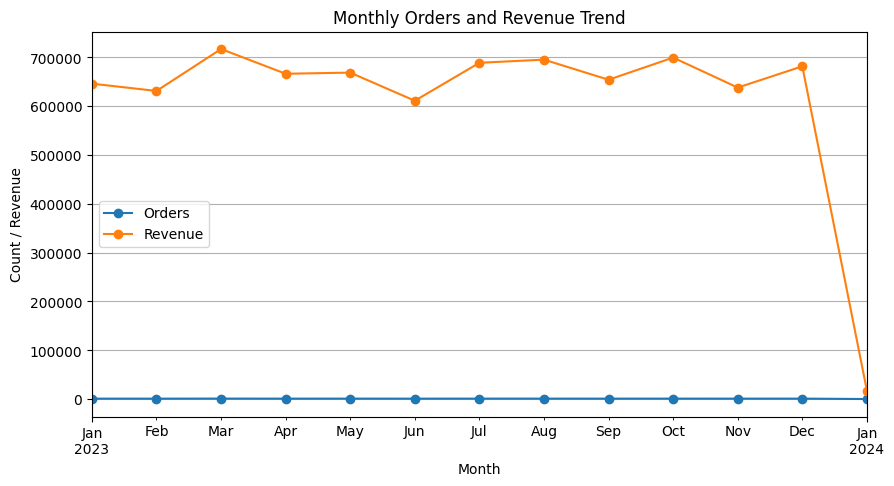

In [19]:
# Orders per month
orders_monthly = final_df.groupby(final_df['order_date'].dt.to_period('M'))['order_id'].count()

# Revenue per month
revenue_monthly = final_df.groupby(final_df['order_date'].dt.to_period('M'))['total_amount'].sum()

# Plot
plt.figure(figsize=(10,5))
orders_monthly.plot(marker='o', label='Orders')
revenue_monthly.plot(marker='o', label='Revenue')
plt.title("Monthly Orders and Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Count / Revenue")
plt.legend()
plt.grid(True)
plt.show()


<h5>Shows monthly trends in orders and revenue, helping identify peak periods, seasonal spikes, and demand growth.</h5>

<h2>User behavior patterns</h2>

In [20]:
# Orders per user
user_orders = final_df.groupby('user_id')['order_id'].count()

# Average order value per user
avg_order_value = final_df.groupby('user_id')['total_amount'].mean()

# Top 10 users by total spend
top_users = final_df.groupby('user_id')['total_amount'].sum().sort_values(ascending=False).head(10)
print(top_users)


user_id
1515    11556.49
650     10747.44
496      9634.30
2586     9486.61
2615     9237.32
636      9087.09
2973     9063.07
874      8916.55
1337     8907.50
2694     8875.71
Name: total_amount, dtype: float64


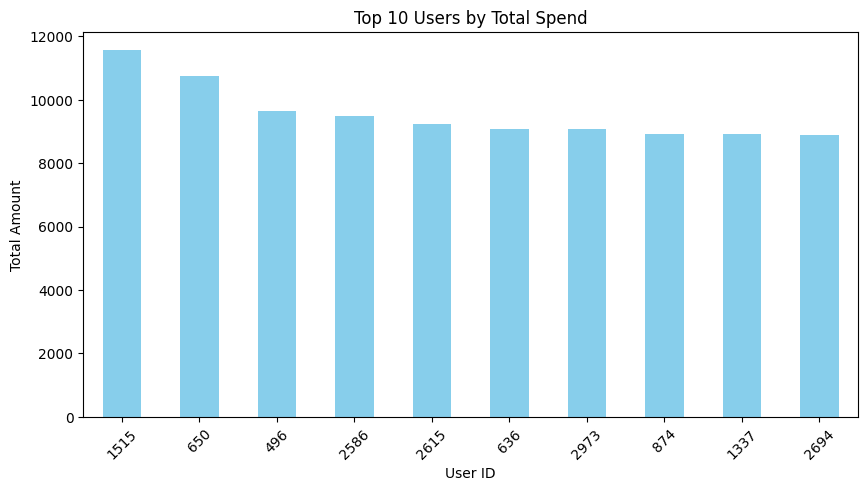

In [21]:
plt.figure(figsize=(10,5))
top_users.plot(kind='bar', color='skyblue')
plt.title("Top 10 Users by Total Spend")
plt.xlabel("User ID")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


<h2>City-wise and cuisine-wise performance</h2>

In [23]:
# Revenue per city
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)

# Top cuisines per city
city_cuisine = final_df.groupby(['city','cuisine'])['order_id'].count().unstack()

# It creates a multi-level index where each unique pair of city and cuisine forms a group.
# .unstack() reshapes the multi-index Series into a DataFrame.

city_revenue.head(10)
city_cuisine.head(10)



cuisine,Chinese,Indian,Italian,Mexican
city,,,,
Bangalore,656,697,699,699
Chennai,600,552,641,676
Hyderabad,588,577,580,605
Pune,574,643,612,601


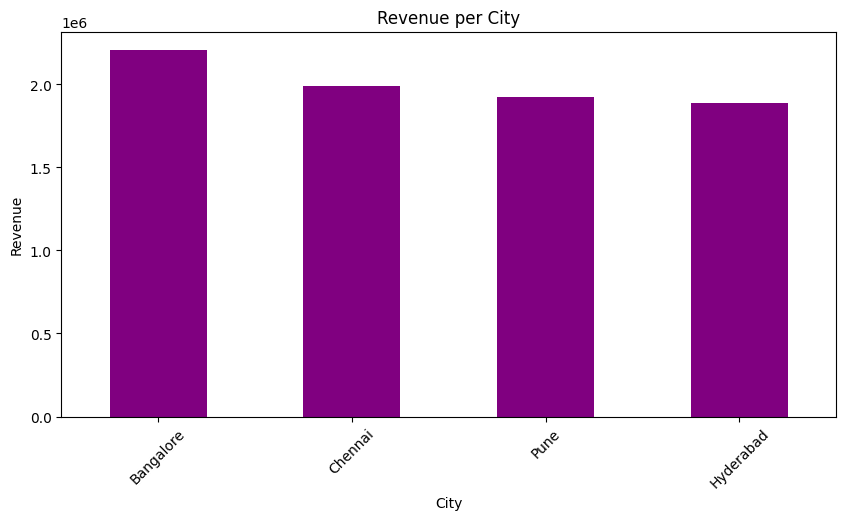

In [25]:
# Plot city revenue
plt.figure(figsize=(10,5))
city_revenue.plot(kind='bar', color='purple')
plt.title("Revenue per City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


<h5>Shows which cities and cuisines generate the most revenue, guiding location-based and menu-based business decisions</h5>

<h2>Membership impact (Gold vs Regular)</h2>

In [26]:
membership_stats = final_df.groupby('membership').agg({
    'order_id':'count',
    'total_amount':'sum',
    'user_id':'nunique'
}).rename(columns={'order_id':'total_orders','total_amount':'total_revenue','user_id':'unique_users'})

print(membership_stats)


            total_orders  total_revenue  unique_users
membership                                           
Gold                4987     3975364.89          1430
Regular             5013     4036259.23          1453


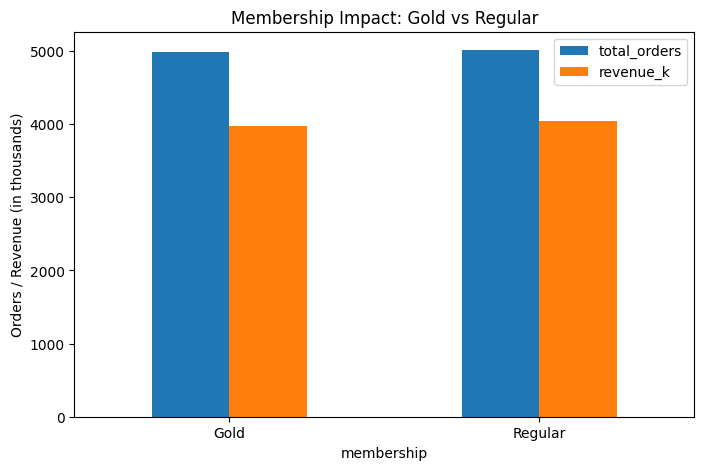

In [28]:
# Scale revenue to thousands for better visual
membership_stats['revenue_k'] = membership_stats['total_revenue'] / 1000

membership_stats[['total_orders','revenue_k']].plot(kind='bar', figsize=(8,5))
plt.title("Membership Impact: Gold vs Regular")
plt.ylabel("Orders / Revenue (in thousands)")
plt.xticks(rotation=0)
plt.show()


<h2>Revenue distribution and seasonality</h2>

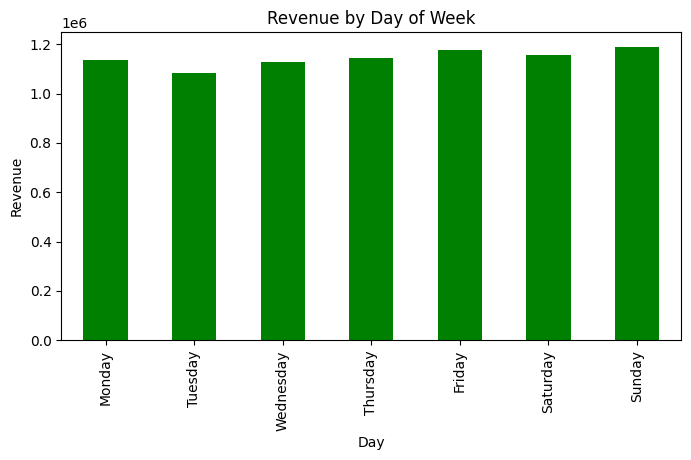

In [29]:
# Revenue by day of week
dow_revenue = final_df.groupby(final_df['order_date'].dt.day_name())['total_amount'].sum()

# Order of weekdays
dow_revenue = dow_revenue.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Plot
plt.figure(figsize=(8,4))
dow_revenue.plot(kind='bar', color='green')
plt.title("Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()


<h2>1. Which city has the highest total revenue (total_amount) from Gold members?  
</h2>

In [32]:

gold_df = final_df[final_df['membership'] == 'Gold']
gold_city_revenue = gold_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
gold_city_revenue


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

<h2>2.Which cuisine has the highest average order value across all orders?</h2>

In [34]:

cuisine_avg_order = final_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)

top_cuisine = cuisine_avg_order.idxmax()
top_avg = cuisine_avg_order.max()
print(f"Cuisine with highest average order value: {top_cuisine} ({top_avg:.2f})")


Cuisine with highest average order value: Mexican (808.02)


<h2>3.How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?</h2>

In [35]:
high_value_users = final_df.groupby('user_id')['total_amount'].sum()
distinct_users = (high_value_users > 1000).sum()
print(distinct_users)


2544


<h2>4.Which restaurant rating range generated the highest total revenue?
</h2>

In [38]:
bins = [0, 3.5, 4.0, 4.5, 5.0]
labels = ['3.0 – 3.5', '3.6 – 4.0', '4.1 – 4.5', '4.6 – 5.0']
final_df['rating_range'] = pd.cut(final_df['rating'], bins=bins, labels=labels, right=True)
rating_revenue = final_df.groupby('rating_range')['total_amount'].sum()
top_rating_range = rating_revenue.idxmax()
print(top_rating_range)


4.6 – 5.0


C:\Users\moham\AppData\Local\Temp\ipykernel_13544\1765872027.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = final_df.groupby('rating_range')['total_amount'].sum()


<h2>5.Among Gold members, which city has the highest average order value?
</h2>

In [39]:
gold_df = final_df[final_df['membership'] == 'Gold']
city_avg_order = gold_df.groupby('city')['total_amount'].mean()
top_city = city_avg_order.idxmax()
print(top_city)


Chennai


<h2>6.Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?</h2>

In [40]:
cuisine_stats = final_df.groupby('cuisine').agg({
    'restaurant_id':'nunique',
    'total_amount':'sum'
}).sort_values(by='total_amount', ascending=False)

cuisine_stats = cuisine_stats.sort_values(['restaurant_id', 'total_amount'], ascending=[True, False])
top_cuisine = cuisine_stats.index[0]
print(top_cuisine)


Chinese


<h2>7.What percentage of total orders were placed by Gold members? (Rounded to nearest integer)</h2>

In [41]:
total_orders = final_df.shape[0]
gold_orders = final_df[final_df['membership'] == 'Gold'].shape[0]
percentage = round((gold_orders / total_orders) * 100)
print(percentage)


50


<h2>8.Which restaurant has the highest average order value but less than 20 total orders?</h2>

In [43]:
restaurant_stats = final_df.groupby('restaurant_name_x').agg({
    'total_amount':'mean',
    'order_id':'count'
})

filtered_restaurants = restaurant_stats[restaurant_stats['order_id'] < 20]
top_restaurant = filtered_restaurants['total_amount'].idxmax()
print(top_restaurant)


Hotel Dhaba Multicuisine


In [44]:
restaurant_stats = final_df.groupby('restaurant_name_y').agg({
    'total_amount':'mean',
    'order_id':'count'
})

filtered_restaurants = restaurant_stats[restaurant_stats['order_id'] < 20]
top_restaurant = filtered_restaurants['total_amount'].idxmax()
print(top_restaurant)


Restaurant_294


<h2>9.Which combination contributes the highest revenue?</h2>

In [53]:
combo_revenue = final_df.groupby(['membership','cuisine'])['total_amount'].sum()
top_combo = combo_revenue.idxmax()
print(top_combo)
#Based on the provided final dataset, the combination of Regular members and Mexican cuisine generates the highest total revenue

('Regular', 'Mexican')


<h2>10.During which quarter of the year is the total revenue highest?</h2>

In [57]:
final_df['quarter'] = final_df['order_date'].dt.quarter

quarter_revenue = final_df.groupby('quarter')['total_amount'].sum()

top_quarter_num = quarter_revenue.idxmax()
print(top_quarter_num)
# quarter 3 which means it is jul-sep

3


<h1>Numerical Questions</h1>

<h3>1.How many total orders were placed by users with Gold membership?</h3>

In [58]:
gold_orders = final_df[final_df['membership'] == 'Gold'].shape[0]
print(gold_orders)


4987


<h3>2.What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?</h3>

In [61]:
hyderabad_revenue = final_df[final_df['city'] == 'Hyderabad']['total_amount'].sum()
print(round(hyderabad_revenue))


1889367


<h3>3.How many distinct users placed at least one order?
</h3>

In [62]:
distinct_users = final_df['user_id'].nunique()
print(distinct_users)


2883


<h3>4.What is the average order value (rounded to 2 decimals) for Gold members?
</h3>

In [63]:
avg_gold_order = final_df[final_df['membership'] == 'Gold']['total_amount'].mean()
print(round(avg_gold_order, 2))


797.15


<h3>5.How many orders were placed for restaurants with rating ≥ 4.5?
</h3>

In [64]:
high_rating_orders = final_df[final_df['rating'] >= 4.5].shape[0]
print(high_rating_orders)


3374


<h3>6.How many orders were placed in the top revenue city among Gold members only?
</h3>

In [65]:
gold_df = final_df[final_df['membership'] == 'Gold']
top_city = gold_df.groupby('city')['total_amount'].sum().idxmax()
orders_top_city = gold_df[gold_df['city'] == top_city].shape[0]
print(orders_top_city)


1337


In [66]:
final_df.shape

(10000, 14)